<a href="https://colab.research.google.com/github/ekmungi/ml_examples/blob/master/pytorch_cnn_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !pip3 install torch torchvision

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.utils.data import Dataset, DataLoader

In [2]:
composed = transforms.Compose([transforms.RandomHorizontalFlip(),
                               transforms.RandomVerticalFlip(),
                               transforms.ToTensor()])

In [3]:
train_dataset = dsets.FashionMNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.FashionMNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

26427392it [00:02, 8821751.69it/s]                               


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 452243.15it/s]
  1%|          | 40960/4422102 [00:00<00:12, 362643.42it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:00, 7890597.51it/s]                             
8192it [00:00, 151321.82it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [25]:
batch_size = 1500

In [26]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [27]:
print(len(train_loader))
for image, label in train_loader:
    print(image.shape, label.shape, image[0,0,:,:].max())
    break

40
torch.Size([1500, 1, 28, 28]) torch.Size([1500]) tensor(1.)


In [28]:
class GlobalMaxPool2D(nn.Module):
    '''
    Reduce to feature space
    '''
    def __init__(self):
        super(GlobalMaxPool2D, self).__init__()
        
    def forward(self, x):
        x =  torch.max(torch.max(x, 3, keepdim=False)[0], 2, keepdim=False)[0]
        return x


class Flatten(nn.Module):
    def __init__(self):
        super(Flatten, self).__init__()

    def forward(self, input):
        return input.view(input.size(0), -1)

class CNNModel(nn.Module):
    def __init__(self, n_classes, debug=False):
        super(CNNModel, self).__init__()
        
        
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.maxpool = nn.MaxPool2d(kernel_size=2)
        self.global_maxpool = GlobalMaxPool2D()
        self.fc1 = nn.Linear(in_features=256, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=10)
        self.relu = nn.LeakyReLU(inplace=True)
        self.dropout2d = nn.Dropout2d()
        self.dropout = nn.Dropout()
        self.flatten = Flatten()
        

        self.debug = debug
        
    def forward(self, x):
        x = self.maxpool(self.relu(self.conv1(x)))
        if self.debug:
            print(x.shape)
        x = self.maxpool(self.relu(self.conv2(x)))
        x = self.dropout2d(x)
        if self.debug:
            print(x.shape)
        x = self.maxpool(self.relu(self.conv3(x)))
        if self.debug:
            print(x.shape)
        
        # x = self.global_maxpool(x)
        x = self.flatten(x)
        x = self.dropout(x)
        if self.debug:
            print(x.shape)

        
        
        x = self.fc1(x)
        x = self.dropout(x)
        if self.debug:
            print(x.shape)
        x = self.fc2(x)
        if self.debug:
            print(x.shape)

        
        return x
            
        
        

In [29]:
n_classes = 10
model = CNNModel(n_classes, debug=True)
for image, label in train_loader:
    print(image.shape, label.shape, image[0,0,:,:].max())
    out = model(image)
    break

torch.Size([1500, 1, 28, 28]) torch.Size([1500]) tensor(1.)
torch.Size([1500, 16, 13, 13])
torch.Size([1500, 32, 5, 5])
torch.Size([1500, 64, 2, 2])
torch.Size([1500, 256])
torch.Size([1500, 64])
torch.Size([1500, 10])


0 : 1.2893339395523071, 61
1 : 0.9050641059875488, 71
2 : 0.8150016069412231, 73
3 : 0.7713945508003235, 75
4 : 0.7021328806877136, 76
5 : 0.6834001541137695, 77
6 : 0.6462817192077637, 78
7 : 0.6820837259292603, 79
8 : 0.6524166464805603, 80
9 : 0.5602344274520874, 80
10 : 0.5524293184280396, 81
11 : 0.590955913066864, 81
12 : 0.56954425573349, 82
13 : 0.5172807574272156, 82
14 : 0.5542867183685303, 82
15 : 0.5250877737998962, 83
16 : 0.5463279485702515, 83
17 : 0.5344449281692505, 83
18 : 0.4910275340080261, 83
19 : 0.5226996541023254, 83
20 : 0.48766228556632996, 83
21 : 0.46432530879974365, 84
22 : 0.5211029648780823, 84
23 : 0.4878729581832886, 84
24 : 0.4691540002822876, 84
25 : 0.48120537400245667, 84
26 : 0.46194109320640564, 85
27 : 0.47796985507011414, 85
28 : 0.5023258924484253, 85
29 : 0.47398221492767334, 85
30 : 0.4596015214920044, 85
31 : 0.4811587631702423, 85
32 : 0.45428666472435, 85
33 : 0.46175676584243774, 85
34 : 0.44499915838241577, 85
35 : 0.4292072057723999, 85

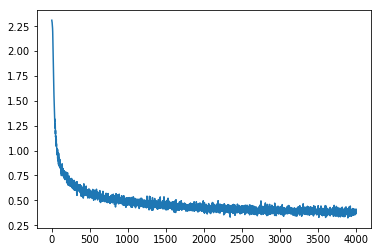

In [32]:
num_epochs = 100
learning_rate = 0.001

n_classes = 10

model = CNNModel(n_classes, debug=False)


loss_list = []

if torch.cuda.is_available():
    model.cuda()
criterion = nn.CrossEntropyLoss()

# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)

for epoch in range(num_epochs):
    model.train()
    for iteration, (image, label) in enumerate(train_loader):


        if torch.cuda.is_available():
            X = image.cuda()
            y = label.cuda()
        else:
            X = image
            y = label


        optimizer.zero_grad()
        y_pred = model(X)
        # break
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
        loss_list.append(loss.cpu().data)
    
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for iteration, (image, label) in enumerate(test_loader):
            if torch.cuda.is_available():
                X = image.cuda()
                y = label.cuda()
            else:
                X = image
                y = label

            y_pred = model(X)

            _, predicted = torch.max(y_pred.data, 1)

            total += y.size(0)

            if torch.cuda.is_available():
                correct += (predicted.cpu() == y.cpu()).sum()
            else:
                correct += (predicted == y).sum()

        print("{0} : {1}, {2}".format(epoch, loss.cpu().data, np.round(100*correct/total, 2)))


        

plt.plot(np.arange(0,len(loss_list)), np.array(loss_list))